# Domain-specific area
The domain area we will be looking at for this report is the real estate market within United states. Real estate is a significant area of the economy that involves selling, buying, renting and leasing. The real estate market is heavily influenced by different variables such as land space of the property, location and other demographics. Through implementation of linear regression on this dataset, it will be able to provide some insights into the industry and be a valuable tool for buyers, sellers and even investors. The model can provide data-driven prediction and analysis for its users and for policy-makers to make better informed decisions on the current housing market within the United States. This also helps ensure that the property values of houses remain affordable as well as help with urban planning too. Policy-makers can also better plan out the urban environment such as building of community structures which could potentially affect the property prices around the area. 


# Objectives

The main objectives for this project is to develop a linear regression model to predict the property prices based on factors such as number of bedrooms and the land space. Through the prediction of the property prices, it would assist buyers and sellers ensure that the houses are fairly priced and help stabilize the real estate market. We can also observe market trends to see identify and predict the rise and fall of property prices in different states. We will also do an analysis on the different states to see the general property prices for each state to get a sensing of the market's performance in each state. 


# Dataset
### Description
The dataset chosen for this project is called "USA Real Estate Dataset" and it is taken from kaggle. Kaggle is a website that hosts data science and machine learning competitions, it also is a source for datasets to be used in such fields. The dataset contains the following columns:
* status - Housing status (ready for sale / ready to build)
* bed - number of bedrooms
* bath - number of bathrooms
* acre_lot - property / land size (acres)
* city - city name 
* state - state name
* zip_code - postal code of area
* house_size - living area in square feet
* prev_sold_date - previous date house was sold
* price - housing price previously sold for

This dataset is suitable for our usecase as it has data such as number of bedrooms, number of bathrooms, the house size and price of the property. All these data fields will be essential for our market analysis and linear regression model's training. Factors such as the number of bedroom is relevant as houses with more bedrooms could significantly impact its pricing, as with more rooms it usually will have a higher value. Also land space would be important as areas that are land scarced will have a higher premium for the land space the property is occupying. The dataset contains 1401066 rows and 10 columns initially, which is a significant amount of data, however it is to be noted that with some data cleaning and dropping of data, the amount of rows will vary. The types of data found in the dataset are a mix of objects and float64 data types.

# Data preparation
For our data preprocessing, we will be checking the dataframe for nan values and duplicates. In order to make the dataset 1 normal form (1nf), there should not be any duplicates also to ensure the data is accurate and not corrupted nan values are removed in their respective columns. This would enhance the predictive model and allow for visualization clarity when we do our data visualization later on. Some data columns will be dropped as well as they would likely not be useful in our data analysis and would keep our dataframe neat.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading in dataset
df = pd.read_csv("realtor-data.csv")
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [3]:
#datatype
df_type = df.dtypes
print(df_type)

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object


In [4]:
#checking for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

1249026


In [5]:
#dropping the duplicates and rows to make into 1nf 
df = df.drop_duplicates()
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [6]:
#checking for nan values
df.isna().sum()

status                0
bed               25249
bath              23541
acre_lot          36966
city                 36
state                 0
zip_code             47
house_size        49469
prev_sold_date    72621
price                20
dtype: int64

In [7]:
df = df.dropna()
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
10344,for_sale,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,950000.0
10351,for_sale,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,6899000.0
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0
...,...,...,...,...,...,...,...,...,...,...
1400975,for_sale,4.0,2.0,0.50,Friendship,New York,14739.0,1822.0,2014-12-26,147500.0
1400992,for_sale,3.0,3.0,61.60,Belmont,New York,14813.0,1436.0,2006-08-07,469900.0
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0


In [8]:
#dropping rows to keep it below 10,000 rows
df = df.iloc[:10000]
pd.set_option('display.float_format', '{:.2f}'.format)
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.00,3.00,0.09,Dorado,Puerto Rico,949.00,1192.00,2019-06-28,110000.00
10344,for_sale,5.00,4.00,0.99,Saint Thomas,Virgin Islands,802.00,5000.00,2013-10-11,950000.00
10351,for_sale,4.00,6.00,0.83,Saint Thomas,Virgin Islands,802.00,4600.00,2018-04-05,6899000.00
24237,for_sale,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00
24238,for_sale,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00
...,...,...,...,...,...,...,...,...,...,...
410357,for_sale,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00
410361,for_sale,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00
410364,for_sale,6.00,3.00,1.32,Montville,Connecticut,6382.00,2061.00,2004-07-28,349900.00
410365,for_sale,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00


In [9]:
#dropping of columns
df = df.drop(['status'], axis=1)
df

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,7.00,3.00,0.09,Dorado,Puerto Rico,949.00,1192.00,2019-06-28,110000.00
10344,5.00,4.00,0.99,Saint Thomas,Virgin Islands,802.00,5000.00,2013-10-11,950000.00
10351,4.00,6.00,0.83,Saint Thomas,Virgin Islands,802.00,4600.00,2018-04-05,6899000.00
24237,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00
24238,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00
...,...,...,...,...,...,...,...,...,...
410357,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00
410361,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00
410364,6.00,3.00,1.32,Montville,Connecticut,6382.00,2061.00,2004-07-28,349900.00
410365,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00


# Statistical analysis

In [10]:
#statistic of dataframe
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,3.64,2.53,4.32,4562.72,2200.75,662906.32
std,1.53,1.42,189.06,2631.38,1459.64,1277126.15
min,1.00,1.00,0.00,802.00,170.00,10000.00
25%,3.00,2.00,0.17,2563.00,1308.00,269900.00
50%,3.00,2.00,0.34,3869.50,1804.50,389900.00
75%,4.00,3.00,0.98,6266.50,2628.00,639000.00
max,33.00,33.00,18817.00,12998.00,20821.00,60000000.00


### mean
For the mean number of beds it is approximately 3.64, which would mean that the typical house would have 3 or 4 bedrooms. Also the average house would also have about 2 to 3 bathroom per unit, as the mean for bathroom is 2.53. We can ignore the zip_code as it is categorical and not accurate. 

### median
For housing price, it is noted that there is the median price of the houses would be in the 389,000 range, this gives us a sense of the "middle" of the property market. The house size also indicates a median size of 1804 square feet, so while the standard deviation is higher, most of the properties are around the median size. 

### Standard deviation
For the number of bedroom, we have a standard deviation of 1.53 which would indicate that there is a moderate variation for the number of bedrooms across the properties in our dataset. For number of bathrooms, we can see that it has a scoring of 1.8, which is lesser than the number of bedrooms, as generally houses would have more bedrooms compared to bathrooms. An interesting analysis would be our acre_lot having a significantly large standard deviation compared to the mean and median, which would mean there is a large variability. This could be due to houses in urban or rural areas as naturally in a urban environment there is lesser land space for development due to surrounding structures in the city.


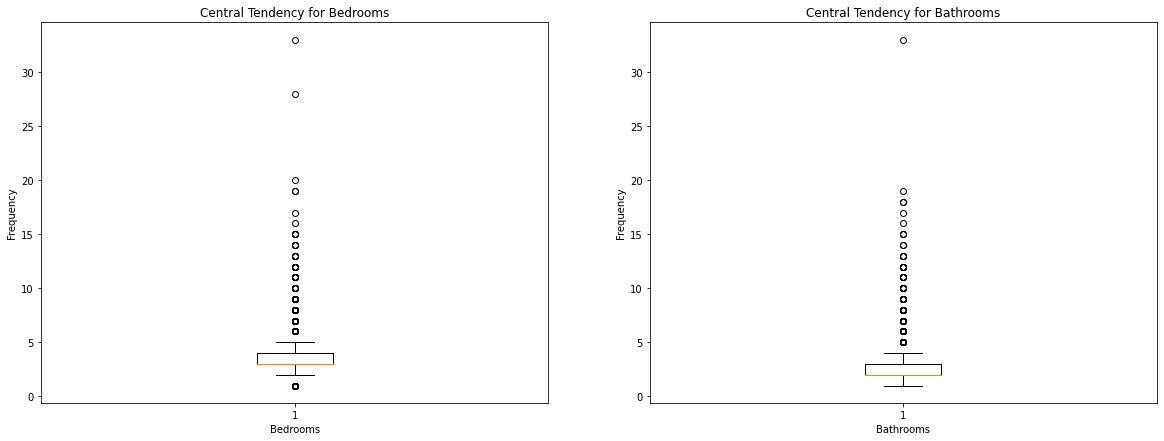

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Boxplot for 'bed' on the first axes
axes[0].boxplot(df['bed'])
axes[0].set_title("Central Tendency for Bedrooms")
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Frequency')

# Boxplot for 'bath' on the second axes
axes[1].boxplot(df['bath'])
axes[1].set_title("Central Tendency for Bathrooms")
axes[1].set_xlabel('Bathrooms')
axes[1].set_ylabel('Frequency')

plt.show()

We can see there are outliers in our bedrooms and bathrooms data columns, we will attempt to filter out the outliers and only accept 10 bedrooms and below, same for the number of bathrooms.

In [12]:
# Calculate q1 and q3
q1_bed = df['bed'].quantile(0.25)
q3_bed = df['bed'].quantile(0.75)
iqr_bed = q3_bed - q1_bed

q1_bath = df['bath'].quantile(0.25)
q3_bath = df['bath'].quantile(0.75)
iqr_bath = q3_bath - q1_bath

# Define bounds for what is considered an outlier
lower_bound_bed = q1_bed - 1.5 * iqr_bed
upper_bound_bed = q3_bed + 1.5 * iqr_bed

lower_bound_bath = q1_bath - 1.5 * iqr_bath
upper_bound_bath = q3_bath + 1.5 * iqr_bath

# Remove outliers
df = df[(df['bed'] >= lower_bound_bed) & (df['bed'] <= upper_bound_bed)]
df = df[(df['bath'] >= lower_bound_bath) & (df['bath'] <= upper_bound_bath)]
df

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
10344,5.00,4.00,0.99,Saint Thomas,Virgin Islands,802.00,5000.00,2013-10-11,950000.00
24237,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00
24238,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00
24244,3.00,2.00,0.46,Agawam,Massachusetts,1001.00,1476.00,1986-11-20,384900.00
24251,3.00,2.00,1.76,Agawam,Massachusetts,1001.00,1968.00,2008-09-19,199999.00
...,...,...,...,...,...,...,...,...,...
410355,3.00,1.00,0.90,Colchester,Connecticut,6415.00,1488.00,2020-06-04,255000.00
410357,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00
410361,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00
410365,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00


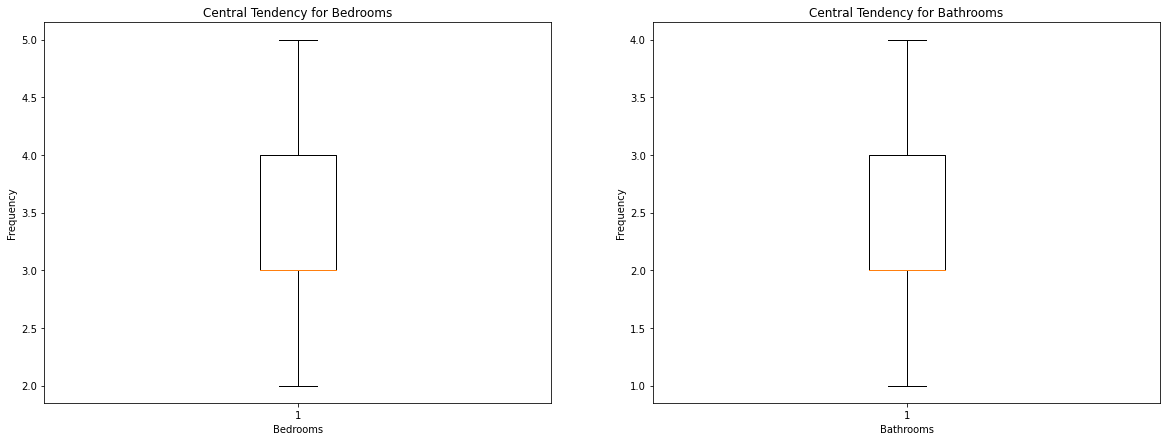

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Boxplot for 'bed' on the first axes
axes[0].boxplot(df['bed'])
axes[0].set_title("Central Tendency for Bedrooms")
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Frequency')

# Boxplot for 'bath' on the second axes
axes[1].boxplot(df['bath'])
axes[1].set_title("Central Tendency for Bathrooms")
axes[1].set_xlabel('Bathrooms')
axes[1].set_ylabel('Frequency')
plt.show()

After removing the outliers, we can see that the boxplot for each data is cleaner and they have similar statistics.

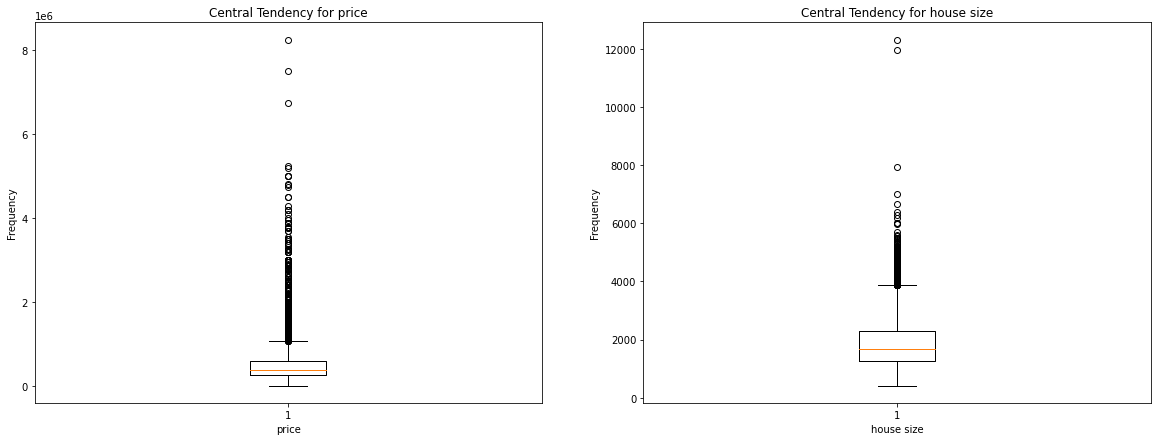

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Boxplot for 'bed' on the first axes
axes[0].boxplot(df['price'])
axes[0].set_title("Central Tendency for price")
axes[0].set_xlabel('price')
axes[0].set_ylabel('Frequency')

# Boxplot for 'bath' on the second axes
axes[1].boxplot(df['house_size'])
axes[1].set_title("Central Tendency for house size")
axes[1].set_xlabel('house size')
axes[1].set_ylabel('Frequency')
plt.show()

We can see that the price column and house_size column has a significant amount of outliers, we will attempt to remove these outliers.

In [15]:
#Calculate q1 and q3
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price

# Calculate q1 and q3
q1_houseSize = df['house_size'].quantile(0.25)
q3_houseSize = df['house_size'].quantile(0.75)
iqr_houseSize = q3_houseSize - q1_houseSize

# Define bounds for what is considered an outlier
lower_bound_price = q1_price - 1.5 * iqr_price
upper_bound_price = q3_price + 1.5 * iqr_price

lower_bound_houseSize = q1_houseSize - 1.5 * iqr_houseSize
upper_bound_houseSize = q3_houseSize + 1.5 * iqr_houseSize

# Remove outliers
#df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]
#df = df[(df['house_size'] >= lower_bound_houseSize) & (df['house_size'] <= upper_bound_houseSize)]
df = df[((df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)) & ((df['house_size'] >= lower_bound_houseSize) & (df['house_size'] <= upper_bound_houseSize))]
df

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
24237,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00
24238,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00
24244,3.00,2.00,0.46,Agawam,Massachusetts,1001.00,1476.00,1986-11-20,384900.00
24251,3.00,2.00,1.76,Agawam,Massachusetts,1001.00,1968.00,2008-09-19,199999.00
24258,4.00,2.00,2.00,Pelham,Massachusetts,1002.00,1607.00,2005-07-25,419000.00
...,...,...,...,...,...,...,...,...,...
410355,3.00,1.00,0.90,Colchester,Connecticut,6415.00,1488.00,2020-06-04,255000.00
410357,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00
410361,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00
410365,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00


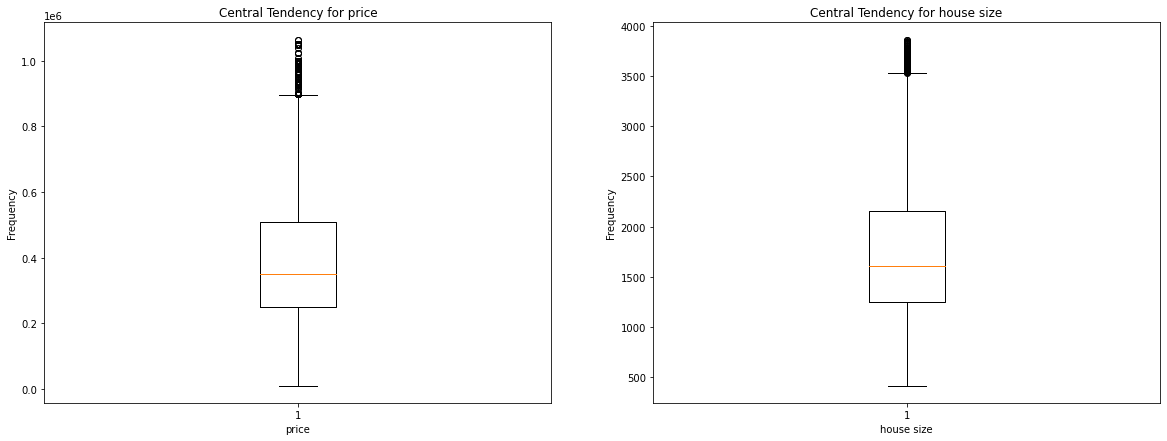

In [16]:
#after removal of outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Boxplot for 'price' on the first axes
axes[0].boxplot(df['price'])
axes[0].set_title("Central Tendency for price")
axes[0].set_xlabel('price')
axes[0].set_ylabel('Frequency')

# Boxplot for 'house_size' on the second axes
axes[1].boxplot(df['house_size'])
axes[1].set_title("Central Tendency for house size")
axes[1].set_xlabel('house size')
axes[1].set_ylabel('Frequency')
plt.show()

There is still outliers even after trimming as when the initial outliers are removed, the interquartile range would have change hence new outliers will be formed.

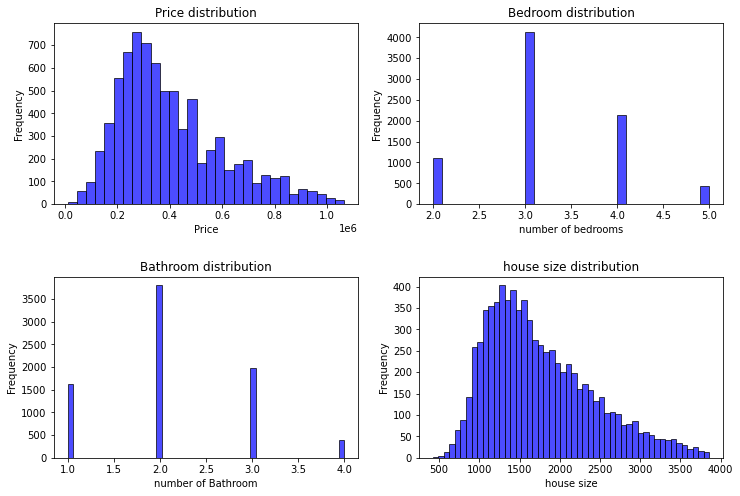

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
#adjust height padding
fig.subplots_adjust(hspace=0.4) 

#price histogram
axes[0][0].hist(df['price'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0][0].set_title('Price distribution')
axes[0][0].set_xlabel('Price')
axes[0][0].set_ylabel('Frequency')

#bedroom historgram
axes[0][1].hist(df['bed'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0][1].set_title('Bedroom distribution')
axes[0][1].set_xlabel('number of bedrooms')
axes[0][1].set_ylabel('Frequency')

#bathroom histogram
axes[1][0].hist(df['bath'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1][0].set_title('Bathroom distribution')
axes[1][0].set_xlabel('number of Bathroom')
axes[1][0].set_ylabel('Frequency')

#house size historgram
axes[1][1].hist(df['house_size'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1][1].set_title('house size distribution')
axes[1][1].set_xlabel('house size')
axes[1][1].set_ylabel('Frequency')

plt.show()

### Skewness
From the distribution charts, we can see for the price distribution histogram, it is right-skewed which can be seen as most of the houses were sold at the lower end of the price range and as the price increased, the number of houses sold started to drop as well. The bedroom and bathroom distribution is discrete as the data is singular integer values such as 2, 3, or 4 bedrooms. Our house distribution also appears to be slightly right-skewed with a significant amount of house sizes being in the 1000 square feet to 2000 square feet range. 

### Kurtosis
The price distribution appears to have a leptokurtic distribution based on the sharp peaks in the histogram this is likely due to the outliers in the data. For the bedroom and bathrooms, its hard to make a judgement on its kurtosis due to the discrete nature of the data. Finally for our house size distribution, it would be mesokurtic distribution as it has a peak that does not appear to be as sharp as the price distribution.

# Data visualization

We will now visualize our data through diagrams from matplot and seaborn.

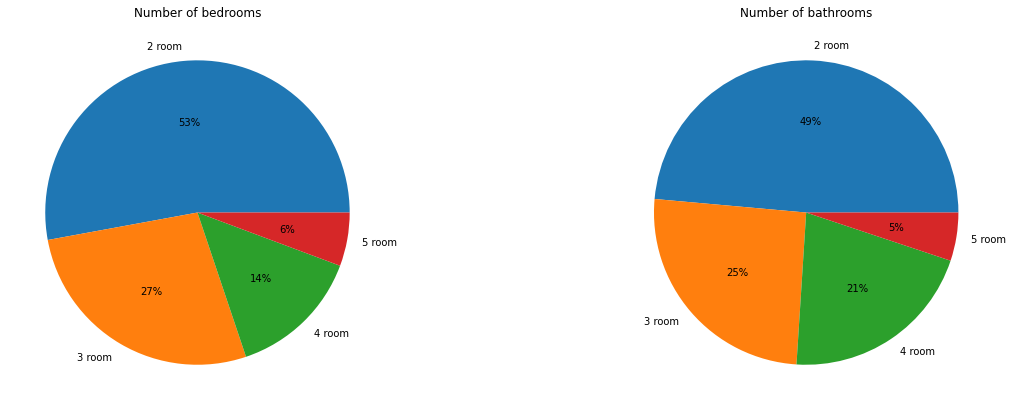

In [18]:
#count number values
bed_count = df["bed"].value_counts()
bed_count
bed_labels = ["2 room", "3 room", "4 room", "5 room"]

bath_count = df["bath"].value_counts()
bath_labels = ["2 room", "3 room", "4 room", "5 room"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

#pie chart
axes[0].pie(bed_count, labels = bed_labels, autopct='%.0f%%')
axes[0].set_title(label="Number of bedrooms")

axes[1].pie(bath_count, labels = bath_labels, autopct='%.0f%%')
axes[1].set_title(label="Number of bathrooms")
plt.show()

Half of the proportion of the properties in the dataset have  2 bedrooms and a minority having 5 room. Similarly for the number of bathrooms, we can see that it is similar, this could show there is some form of relation between the number of bedrooms and number of bathrooms. We shall do further analysis and find out more.

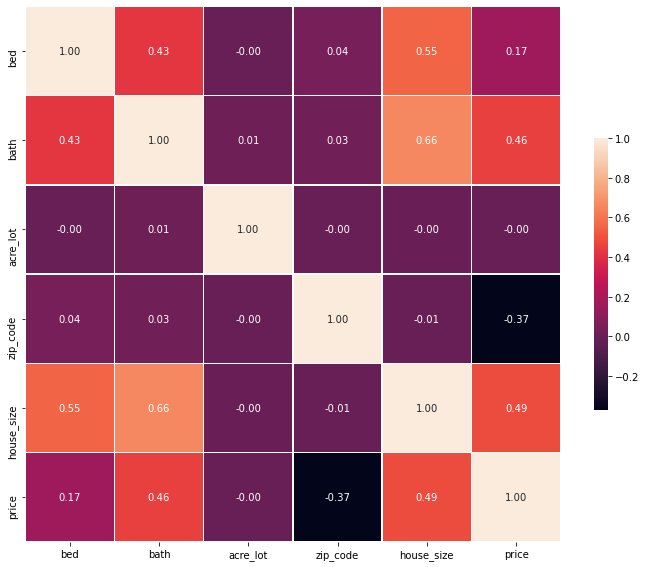

In [19]:
#calculating correlation matrix
corr = df.corr()
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='rocket', square = True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We can see in the heatmap that there is a relatively high relation between the house sizes and the price. This is a common sight as with a bigger living space, the property can usually fetch a higher price. Also the number of bathrooms has a moderately positive correlation with the house sizes and pricing. This is an indicator that houses with more bathrroms can command a higher price.

### Median prices for each number of bedrooms

In [20]:
#calculate median prices for each catergory of bedrooms
df_filtered_bed = df[df['bed'].isin([2, 3, 4, 5])]
median_prices = df_filtered_bed.groupby('bed')['price'].median().reset_index()
median_prices

,bed,price
0,2.00,289900.00
1,3.00,345000.00
2,4.00,414900.00
3,5.00,379900.00


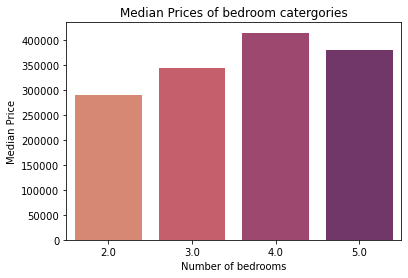

In [21]:
#bar plot to display the median prices
sns.barplot(data=median_prices, x='bed', y='price', palette="flare")
plt.title('Median Prices of bedroom catergories')
plt.xlabel('Number of bedrooms')
plt.ylabel('Median Price')
plt.show()

Interestingly, we can see the median prices of the 4 bedders being priced greater than the 5 bedders. While generally as the number of rooms increases, its price also increases, however with regards to the price difference between the 4 bedders and 5 bedders, this could indicate there is a slightly smaller market for larger homes or the general market trend to not favour more rooms after a certain number of bedrooms.

### Average prices over last 5 years

As the range of prev_sold_date is too large, we shall just focus on the last 5 years in the dataset.

<ipython-input-22-3ccb92d5dfeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])


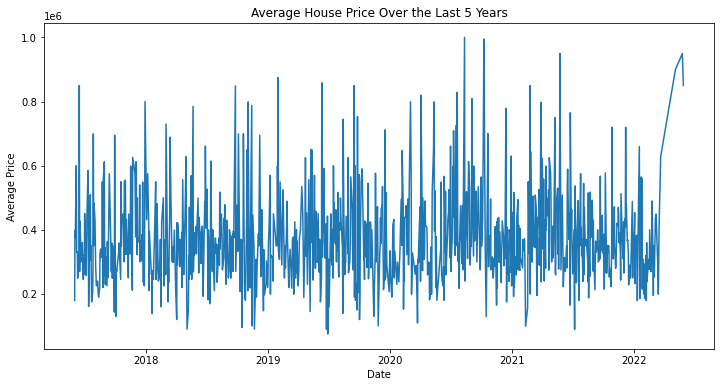

In [22]:
#convert to datetime format
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
#getting most recent sold date
recent_sold_date = df['prev_sold_date'].max()

#five years ago sold date
five_years_ago = recent_sold_date - pd.DateOffset(years=5)
#filter df to have a range of 5 years
df_last_5_years = df[df['prev_sold_date'] > five_years_ago]
#sort the date
df_last_5_years = df_last_5_years.sort_values('prev_sold_date')
#group by price and calculate mean price
price_over_time = df_last_5_years.groupby('prev_sold_date')['price'].mean()

#line graph
plt.figure(figsize=(12, 6))
plt.plot(price_over_time.index, price_over_time.values)
plt.title('Average House Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


We can see from the line graph, that the prices of houses fluctuates a significant amount, this is an indicator that the prices over the years are very volatile with the peaks and troughs being repeated over time. However towards the end of 2022, we notice the trend of the prices going upwards. 

## Market trend for cities and states

### Cities

In [23]:
#count for cities
cities_count = df["city"].value_counts()
cities_count

Waterbury      179
Providence     145
Bristol        140
Manchester     120
Boston         118
              ... 
Weybridge        1
Alburgh          1
Putney           1
Hermon           1
Baileyville      1
Name: city, Length: 826, dtype: int64

As there are too many different cities in the dataset to showcase, we will focus on the top 5 cities.

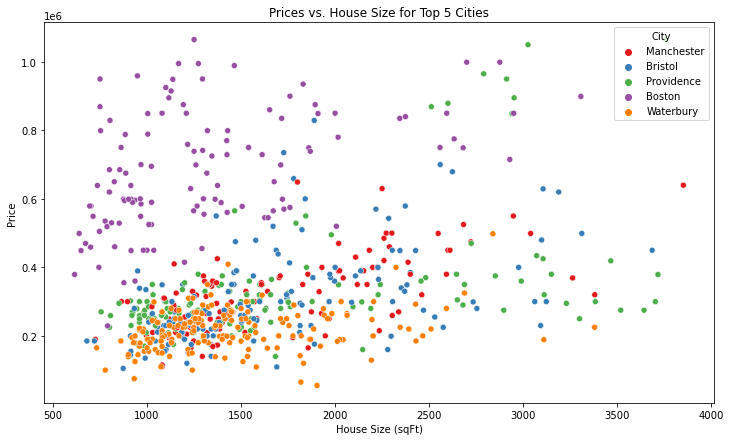

In [24]:
#top 5 cities
top_5_cities = cities_count.head().index
#making df with only top 5 cities
df_top_cities = df[df['city'].isin(top_5_cities)]

plt.figure(figsize=(12, 7))
#scatterplot
sns.scatterplot(data=df_top_cities, x='house_size', y='price', hue='city', palette='Set1')

plt.title('Prices vs. House Size for Top 5 Cities')
plt.xlabel('House Size (sqFt)')
plt.ylabel('Price')
plt.legend(title='City')
plt.show()

We can see in the scatterplot that for a city like Boston, the house prices there are generally higher than the other 4 cities, this is regardless of the house size, most of the smaller houses in Boston commanded a higher price than those larger houses in the other cities. This could mean there is a better economic state in Boston or a higher demand for houses there due to land space, hence driving the prices up.

Also in Waterbury, most of the house sizes there are generally in the range between 1000 square feet to 1500 square feet. This indicates that houses in Waterbury are smaller in size as compared to the other cities, also the price of a house there is generally on the low end as compared to boston, houses in Waterburry can be seen as much more affordable compared to the rest of the cities.

### States

In [25]:
#count for cities
states_count = df["state"].value_counts()
states_count

Connecticut      3112
Massachusetts    2068
Rhode Island     1004
New Hampshire     579
New York          383
Vermont           368
Maine             312
Name: state, dtype: int64

There are too many states to display so we will just take the top 5 states

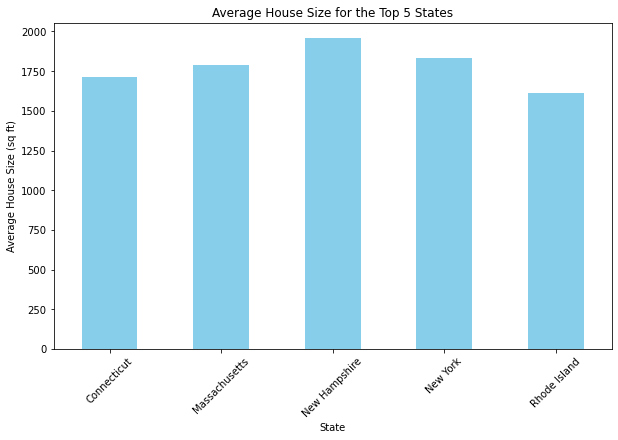

In [26]:
#getting the top 5 states
top_5_states = states_count.head().index

#df with top 5 states
df_top_states = df[df['state'].isin(top_5_states)]

#getting the average house size by top 5 state
avg_house_size_state = df_top_states.groupby('state')['house_size'].mean()
#sorting the values
avg_house_size_state.sort_values()

#bar plot
plt.figure(figsize=(10, 6))
avg_house_size_state.plot(kind='bar', color='skyblue')
plt.title('Average House Size for the Top 5 States')
plt.xlabel('State')
plt.ylabel('Average House Size (sq ft)')
plt.xticks(rotation=45)
plt.show()

We can see that the house sizes across the top 5 states are generally similar with New Hampshire having the greatest average house size across the top 5 states.

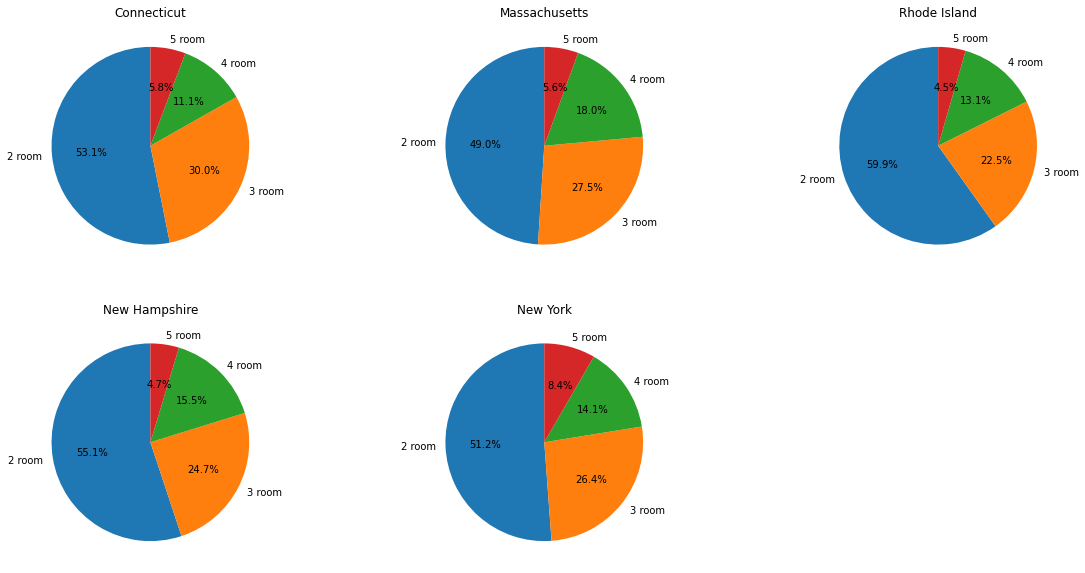

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

#labels for piechart
label_state_piechart = ["2 room", "3 room", "4 room", "5 room"]

#make into 2d array
ax = ax.ravel()

#pie chart for top 5 states
for i, state in enumerate(top_5_states):
    # Get the data for the state
    state_data = df_top_states[df_top_states['state'] == state]
    # Get the bedroom distribution
    bedroom_counts = state_data['bed'].value_counts()
    # Create pie chart for the state
    ax[i].pie(bedroom_counts, labels=label_state_piechart, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(state)
    
#remove unused subplots to fit 2x3 
for i in range(len(top_5_states), len(ax)):
    fig.delaxes(ax[i])

The number of bedrooms distribution for each state are similar with Rhode island having the majority of its bedroom type to be 2 rooms. This visualisation backs the fact that majority of the bedroom types belong to 2 rooms and 3 rooms as we can see in the top 5 states the distribution of the different bedroom types.

### Data evaluation
Overall, visualising the average house prices over the last 5 years was a key factor as it displayed that the housing prices fluctuate significantly and was extremely volatitle. With the steep peaks and troughs, it showed that the  

# Machine learning model

In [28]:
#import sckit library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

#linear regression model
model = LinearRegression()

In [29]:
#getting features and target variable
X = df[["zip_code", "house_size"]]
y = df["price"]

In [30]:
#split dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit model
model.fit(X_train, y_train)

#prediciton 
y_pred = model.predict(X_test)

#mean absolute error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'r-squared: {r2}')
print(f'Mean absolute error: {mae}')

r-squared: 0.3343162005849202
Mean absolute error: 115917.36766324825


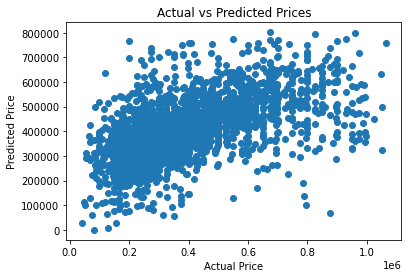

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

### Feature and label
The features selected for our machine learning model are house size and zip code, for our labels chosen for the model, we went with the price. The reason for choosing house size and zip code for our features is due to the correlation of the two data features, they both have a low correlation between each other. Also house size has one of the strongest correlation with our target variable, price. The house size has a correlation with the price as with more living space, it will naturally be able to command a higher price. For the labels, the price was chosen as a target variable as our objective was to predict the housing prices.

### Evaluation
Upon evaluation using mean absolute error and r-square, the model could use some more processing and feature engineering to improve the results.

# Validation

In [32]:
#import library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create an MAE scorer object
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation using the scorer
mae_scores = cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)

# Calculate the mean of the cross-validated scores and negate it to get the positive MAE value
mean_mae_score = -mae_scores.mean()

print(f'Observed mean absolute error from model: {mae}')
print(f'Mean Absolute Error (MAE) from cross-validation: {mean_mae_score}')

Observed mean absolute error from model: 115917.36766324825
Mean Absolute Error (MAE) from cross-validation: 117427.71204516466


We can observe that the mean absolute error from our model and the result obtained form the cross validation are very similar and the result from the cross validation is slightly higher. This shows our model's performance is consistent between the observed mean absolute error and the one from the cross validation. With a slightly higher mean absolute error than the observed it would suggest that our model would be able to generalize well for datas.

# Feature engineering

In [33]:
#import labelencoding to convert states and cities column to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['state'])
df["city_encoded"] = label_encoder.fit_transform(df['city'])
df

<ipython-input-33-d11a719d0806>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state_encoded'] = label_encoder.fit_transform(df['state'])
<ipython-input-33-d11a719d0806>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["city_encoded"] = label_encoder.fit_transform(df['city'])


,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,state_encoded,city_encoded
24237,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00,2,4
24238,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00,2,4
24244,3.00,2.00,0.46,Agawam,Massachusetts,1001.00,1476.00,1986-11-20,384900.00,2,4
24251,3.00,2.00,1.76,Agawam,Massachusetts,1001.00,1968.00,2008-09-19,199999.00,2,4
24258,4.00,2.00,2.00,Pelham,Massachusetts,1002.00,1607.00,2005-07-25,419000.00,2,533
...,...,...,...,...,...,...,...,...,...,...,...
410355,3.00,1.00,0.90,Colchester,Connecticut,6415.00,1488.00,2020-06-04,255000.00,0,144
410357,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00,0,441
410361,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00,0,503
410365,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00,0,741


In order to try to improve the accuracy of our model, we shall create a new feature to be added. By getting the price per square feet, to hopefully imrpvoe the accuracy.

In [34]:
#creating new columns for features
#price per square feet
df['price_per_sqft'] = df['price'] / df['house_size']
df

<ipython-input-34-ad9fa2c57c38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price'] / df['house_size']


,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,state_encoded,city_encoded,price_per_sqft
24237,3.00,3.00,0.45,Agawam,Massachusetts,1001.00,2314.00,2014-06-25,525000.00,2,4,226.88
24238,3.00,2.00,0.36,Agawam,Massachusetts,1001.00,1276.00,2012-10-12,289900.00,2,4,227.19
24244,3.00,2.00,0.46,Agawam,Massachusetts,1001.00,1476.00,1986-11-20,384900.00,2,4,260.77
24251,3.00,2.00,1.76,Agawam,Massachusetts,1001.00,1968.00,2008-09-19,199999.00,2,4,101.63
24258,4.00,2.00,2.00,Pelham,Massachusetts,1002.00,1607.00,2005-07-25,419000.00,2,533,260.73
...,...,...,...,...,...,...,...,...,...,...,...,...
410355,3.00,1.00,0.90,Colchester,Connecticut,6415.00,1488.00,2020-06-04,255000.00,0,144,171.37
410357,4.00,3.00,0.46,Montville,Connecticut,6370.00,2408.00,2016-06-16,379900.00,0,441,157.77
410361,3.00,2.00,0.40,Norwich,Connecticut,6360.00,1585.00,2020-03-20,289000.00,0,503,182.33
410365,4.00,3.00,0.29,Waterford,Connecticut,6385.00,2000.00,2014-08-11,344900.00,0,741,172.45


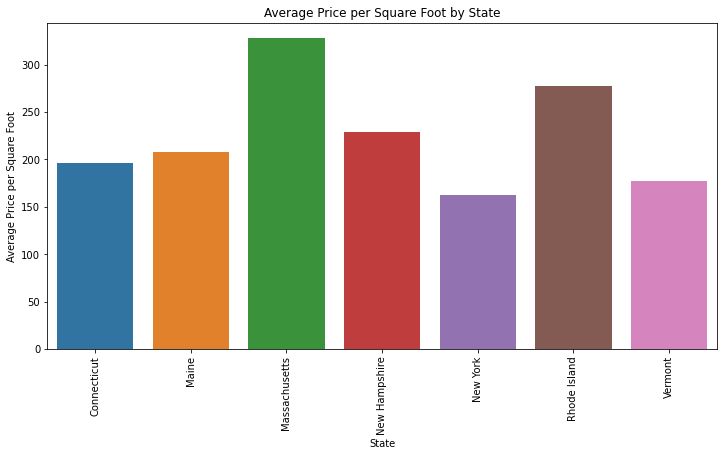

In [35]:
#getting the average for each state
Avg_price_per_sqft_state = df.groupby('state')['price_per_sqft'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=Avg_price_per_sqft_state.index, y=Avg_price_per_sqft_state.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by State')
plt.show()

We can see that Massachusetts has the highest price per square feet out of all the states. We shall use this new feature to improve the model.

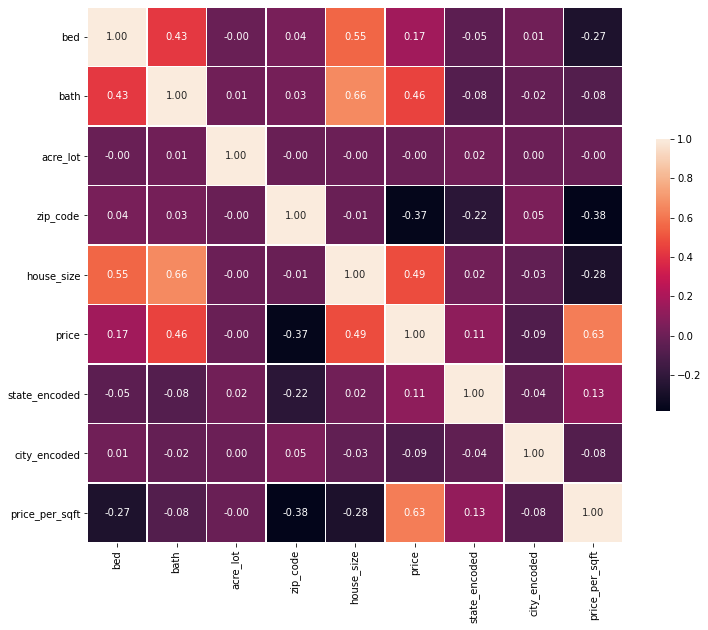

In [36]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='rocket', square = True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

r-squared before feature engineering: 0.3343162005849202
r-squared before feature engineering: 0.852325370076362

Mean absolute error before feature engineering: 115917.36766324825
Mean absolute error after feature engineering: 43405.36578584717


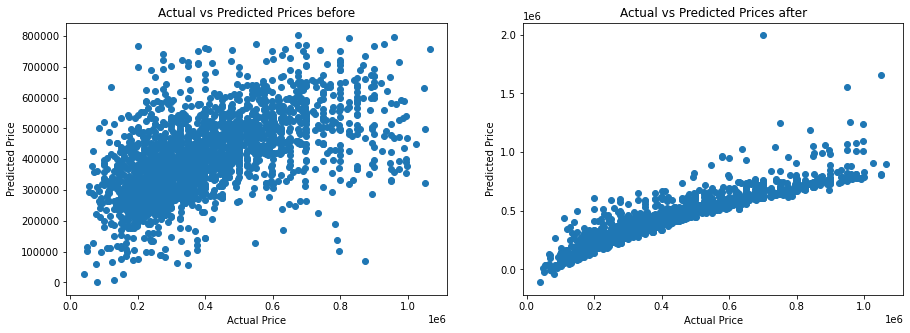

In [37]:
#adding in more feature to improve model
X_improved = df[["zip_code", "house_size", "bed","state_encoded", "city_encoded", "price_per_sqft"]]
y = df["price"]

#split dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size=0.3, random_state=42)

#fit model
model.fit(X_train, y_train)

#prediciton 
y_pred_improved = model.predict(X_test)

#mean absolute error
r2_improved = r2_score(y_test, y_pred_improved)
mae_improved = mean_absolute_error(y_test, y_pred_improved)

print(f'r-squared before feature engineering: {r2}')
print(f'r-squared before feature engineering: {r2_improved}')
print(f'\nMean absolute error before feature engineering: {mae}')
print(f'Mean absolute error after feature engineering: {mae_improved}')

#1 row 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5)) 

#scatter plot before feature engineering
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Price')
axs[0].set_ylabel('Predicted Price')
axs[0].set_title('Actual vs Predicted Prices before')

#scatter plot after feature engineering
axs[1].scatter(y_test, y_pred_improved)
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Predicted Price')
axs[1].set_title('Actual vs Predicted Prices after')

plt.show()

We can see that there is a great reduction in the mean absolute error after performing some feature engineering, the r-squared has also improved greatly. We added in more features to improve the model as well as convert our states and cities data from categorical to numerical form to allow it to be used as a feature for the model. The label encoder mapped our categorical data to numerical forms to allow the model to train on more datas. Also by creating new features, such as the introduction of price per square feet, we greatly reduced our mean absolute error by approximately 70,000 and the r-squared improved to 85%.

# Evaluation of model
### Numerical evaluation
The mean absolute error has improved after feature engineering was done to it and a lower mean absolute error would be an indication of better performance, hence the reduction done by the feature engineering helped improved the model's accuracy. The r-squared value was approximately 0.334 before, but after feature engineering was done they have improved. Now with a r-squared of 0.85, it would indicate that our model has an accurate rate of prediction between the dependant and independant value.

### MAE (mean absolute error)
The reason why we went with mean absolute error as compared to mean squared error is mainly due to our dataset being of a real estate domain. Within a housing dataset, there usually is a significant amount of outliers such as the prices, where they can be really volatile due to market and economic trends. With mean absolute error, the metric is less sensitive to such outliers, so this would not affect the accuracy of our results too significantly. Also with mean absolute errors, all the errors encountered from the model are treated equally so the penalty is not that great for larger errors.

### Domain-specific area
Overall this model was aimmed at predicting the housing prices within the United States as well as giving useful insights into the the real estate industry. With the model, it will help potential buyers or sellers make better informed decisions on a specific property based on its factors. The model would also help potentially stabilise the real estate market, by giving a predictive value and allowing the property to be fairly priced.

This solution can definitely be transferable to other domains more specifically to domains with continuous data points such as stock market prediction, food prices or fuel prices. As the solution is based off a linear regression model, it is simple and allows for straight forward interpretation with a group of predictive variables and a target variable. As it also models the results in a straight line, it will naturally align with the continuous data and the relationship between the dependant variable and independant variable is linear. 